In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

gMobG = pd.read_csv(r"data/3. mobilitas global, indo/google/Global_Mobility_Report.csv")
gMobG[gMobG["country_region"].isna()]
# gw bingung bersihinnya gmn, sejauh ini pake yg blm dibersihin dl

/Users/owner/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
213071,"AR,Argentina,Entre Rios,""La Paz Department, En...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213072,"AR,Argentina,Entre Rios,""La Paz Department, En...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213073,"AR,Argentina,Entre Rios,""La Paz Department, En...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213074,"AR,Argentina,Entre Rios,""La Paz Department, En...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213075,"AR,Argentina,Entre Rios,""La Paz Department, En...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354092,"AR,Argentina,Santiago del Estero Province,""Cap...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354093,"AR,Argentina,Santiago del Estero Province,""Cap...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354094,"AR,Argentina,Santiago del Estero Province,""Cap...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354095,"AR,Argentina,Santiago del Estero Province,""Cap...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
gMobGClean = gMobG[(gMobG["date"].isna() == False) & (gMobG["retail_and_recreation_percent_change_from_baseline"].isna() == False) & (gMobG["grocery_and_pharmacy_percent_change_from_baseline"].isna() == False) & (gMobG["parks_percent_change_from_baseline"].isna() == False) & (gMobG["transit_stations_percent_change_from_baseline"].isna() == False) & (gMobG["workplaces_percent_change_from_baseline"].isna() == False) & (gMobG["residential_percent_change_from_baseline"].isna() == False)]
gMobGClean["YM"]=pd.DatetimeIndex(gMobGClean['date'])
gMobGClean['YM'] = gMobGClean['YM'].apply(lambda x: x.strftime('%Y-%m'))
totalgMobGClean = gMobGClean.groupby("YM")["retail_and_recreation_percent_change_from_baseline"].mean().reset_index()
totalgMobGClean["grocery_and_pharmacy_percent_change_from_baseline"] = gMobGClean.groupby("YM")["grocery_and_pharmacy_percent_change_from_baseline"].mean().reset_index()["grocery_and_pharmacy_percent_change_from_baseline"]
totalgMobGClean["parks_percent_change_from_baseline"] = gMobGClean.groupby("YM")["parks_percent_change_from_baseline"].mean().reset_index()["parks_percent_change_from_baseline"]
totalgMobGClean["transit_stations_percent_change_from_baseline"] = gMobGClean.groupby("YM")["transit_stations_percent_change_from_baseline"].mean().reset_index()["transit_stations_percent_change_from_baseline"]
totalgMobGClean["workplaces_percent_change_from_baseline"] = gMobGClean.groupby("YM")["workplaces_percent_change_from_baseline"].mean().reset_index()["workplaces_percent_change_from_baseline"]
totalgMobGClean["residential_percent_change_from_baseline"] = gMobGClean.groupby("YM")["residential_percent_change_from_baseline"].mean().reset_index()["residential_percent_change_from_baseline"]
totalgMobGClean

/var/folders/q7/tc0qdssx3957hr676f1fc7kr0000gn/T/ipykernel_917/3495167508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gMobGClean["YM"]=pd.DatetimeIndex(gMobGClean['date'])
/var/folders/q7/tc0qdssx3957hr676f1fc7kr0000gn/T/ipykernel_917/3495167508.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gMobGClean['YM'] = gMobGClean['YM'].apply(lambda x: x.strftime('%Y-%m'))


,YM,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-02,-0.884222,1.229571,2.396212,2.957080,2.946540,0.179930
1,2020-03,-27.222745,-5.806098,-24.424328,-25.923505,-13.509444,9.258249
2,2020-04,-62.853819,-26.447247,-52.663055,-62.158526,-46.788099,22.111812
3,2020-05,-49.709995,-15.161159,-46.966873,-51.394758,-31.003988,17.054778
4,2020-06,-37.448228,-9.493631,-36.778132,-43.242120,-21.233464,13.177037
5,2020-07,-32.827997,-8.342035,-27.279259,-42.058044,-22.462934,12.677524
6,2020-08,-34.923629,-9.334570,-29.279267,-42.956069,-22.378262,12.874431
7,2020-09,-31.266142,-8.139704,-23.133796,-39.702456,-19.418282,10.939476
8,2020-10,-28.591703,-3.328748,-26.706259,-36.985371,-15.617103,9.626565
9,2020-11,-27.282825,-2.698216,-27.646468,-38.404907,-13.813606,8.633978


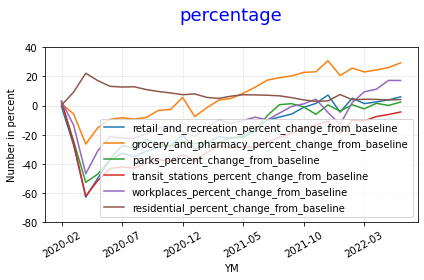

In [4]:
totalgMobGClean.plot(kind = "line", x = "YM", y = ["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline","parks_percent_change_from_baseline","transit_stations_percent_change_from_baseline","workplaces_percent_change_from_baseline","residential_percent_change_from_baseline"])
plt.title("percentage\n", fontsize = 18, color ="blue")
plt.xlabel("YM")
plt.ylabel("Number in percent")
labels, locations = plt.yticks()
#plt.ylim(ymin = 0)
plt.yticks(labels, (labels).astype(int))
#plt.gca().set_xticks(totalgMobGClean["YM"].unique())
plt.grid(color = "darkgray", linestyle = ":",linewidth = 0.5)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='date'>

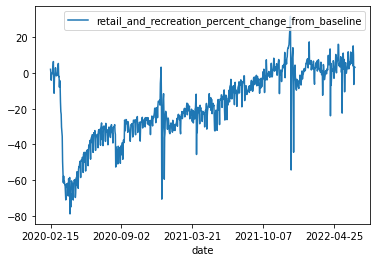

In [7]:
gMobGClean.groupby("date")["retail_and_recreation_percent_change_from_baseline"].mean().reset_index().plot(kind="line", x = "date", y="retail_and_recreation_percent_change_from_baseline")